CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


In [3]:
from model import *
from utils import *

CODE BLOCK: 3

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-5., 5.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=train_transforms)

CODE BLOCK: 5

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

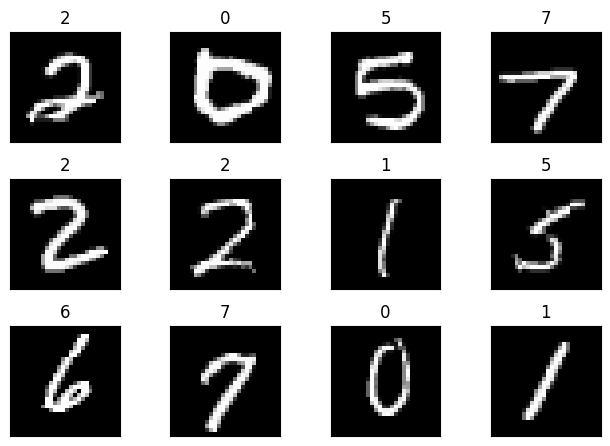

In [7]:
plot_data(train_loader)

CODE BLOCK: 7

CODE BLOCK: 8

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [9]:
model = Net().to(device)
summary(model, input_size= (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
         Dropout2d-4           [-1, 32, 26, 26]               0
            Conv2d-5            [-1, 8, 26, 26]             256
              ReLU-6            [-1, 8, 26, 26]               0
       BatchNorm2d-7            [-1, 8, 26, 26]              16
         Dropout2d-8            [-1, 8, 26, 26]               0
            Conv2d-9           [-1, 10, 24, 24]             720
             ReLU-10           [-1, 10, 24, 24]               0
      BatchNorm2d-11           [-1, 10, 24, 24]              20
        Dropout2d-12           [-1, 10, 24, 24]               0
        MaxPool2d-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1, 16,

In [10]:
# model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.8)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 1


  0%|          | 0/938 [00:00<?, ?it/s]

Train: Loss=0.0846 Batch_id=937 Accuracy=92.36: 100%|██████████| 938/938 [00:34<00:00, 27.03it/s]


Test set: Average loss: 0.0636, Accuracy: 58884/60000 (98.14%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 2


Train: Loss=0.0181 Batch_id=937 Accuracy=97.81: 100%|██████████| 938/938 [00:36<00:00, 25.55it/s]


Test set: Average loss: 0.0461, Accuracy: 59153/60000 (98.59%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 3


Train: Loss=0.0096 Batch_id=937 Accuracy=98.11: 100%|██████████| 938/938 [00:36<00:00, 25.63it/s]


Test set: Average loss: 0.0409, Accuracy: 59283/60000 (98.81%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 4


Train: Loss=0.0312 Batch_id=937 Accuracy=98.50: 100%|██████████| 938/938 [00:37<00:00, 25.26it/s]


Test set: Average loss: 0.0387, Accuracy: 59285/60000 (98.81%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 5


Train: Loss=0.0655 Batch_id=937 Accuracy=98.52: 100%|██████████| 938/938 [00:36<00:00, 25.37it/s]


Test set: Average loss: 0.0296, Accuracy: 59446/60000 (99.08%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 6


Train: Loss=0.0061 Batch_id=937 Accuracy=98.61: 100%|██████████| 938/938 [00:36<00:00, 25.87it/s]


Test set: Average loss: 0.0252, Accuracy: 59514/60000 (99.19%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 7


Train: Loss=0.0125 Batch_id=937 Accuracy=98.67: 100%|██████████| 938/938 [00:35<00:00, 26.23it/s]


Test set: Average loss: 0.0239, Accuracy: 59580/60000 (99.30%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 8


Train: Loss=0.1160 Batch_id=937 Accuracy=98.81: 100%|██████████| 938/938 [00:35<00:00, 26.41it/s]


Test set: Average loss: 0.0259, Accuracy: 59504/60000 (99.17%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 9


Train: Loss=0.0667 Batch_id=937 Accuracy=98.84: 100%|██████████| 938/938 [00:36<00:00, 26.04it/s]


Test set: Average loss: 0.0232, Accuracy: 59593/60000 (99.32%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 10


Train: Loss=0.0140 Batch_id=937 Accuracy=98.86: 100%|██████████| 938/938 [00:35<00:00, 26.49it/s]


Test set: Average loss: 0.0201, Accuracy: 59627/60000 (99.38%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 11


Train: Loss=0.1798 Batch_id=937 Accuracy=98.97: 100%|██████████| 938/938 [00:38<00:00, 24.64it/s]


Test set: Average loss: 0.0210, Accuracy: 59623/60000 (99.37%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 12


Train: Loss=0.0399 Batch_id=937 Accuracy=98.99: 100%|██████████| 938/938 [00:36<00:00, 25.89it/s]


Test set: Average loss: 0.0215, Accuracy: 59593/60000 (99.32%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 13


Train: Loss=0.0021 Batch_id=937 Accuracy=99.05: 100%|██████████| 938/938 [00:36<00:00, 25.72it/s]


Test set: Average loss: 0.0191, Accuracy: 59643/60000 (99.41%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 14


Train: Loss=0.0572 Batch_id=937 Accuracy=98.99: 100%|██████████| 938/938 [00:36<00:00, 25.38it/s]


Test set: Average loss: 0.0173, Accuracy: 59681/60000 (99.47%)

Adjusting learning rate of group 0 to 2.0000e-02.


CODE BLOCK: 11

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
         Dropout2d-4           [-1, 32, 26, 26]               0
            Conv2d-5            [-1, 8, 26, 26]             256
              ReLU-6            [-1, 8, 26, 26]               0
       BatchNorm2d-7            [-1, 8, 26, 26]              16
         Dropout2d-8            [-1, 8, 26, 26]               0
            Conv2d-9           [-1, 10, 24, 24]             720
             ReLU-10           [-1, 10, 24, 24]               0
      BatchNorm2d-11           [-1, 10, 24, 24]              20
        Dropout2d-12           [-1, 10, 24, 24]               0
        MaxPool2d-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1, 16,

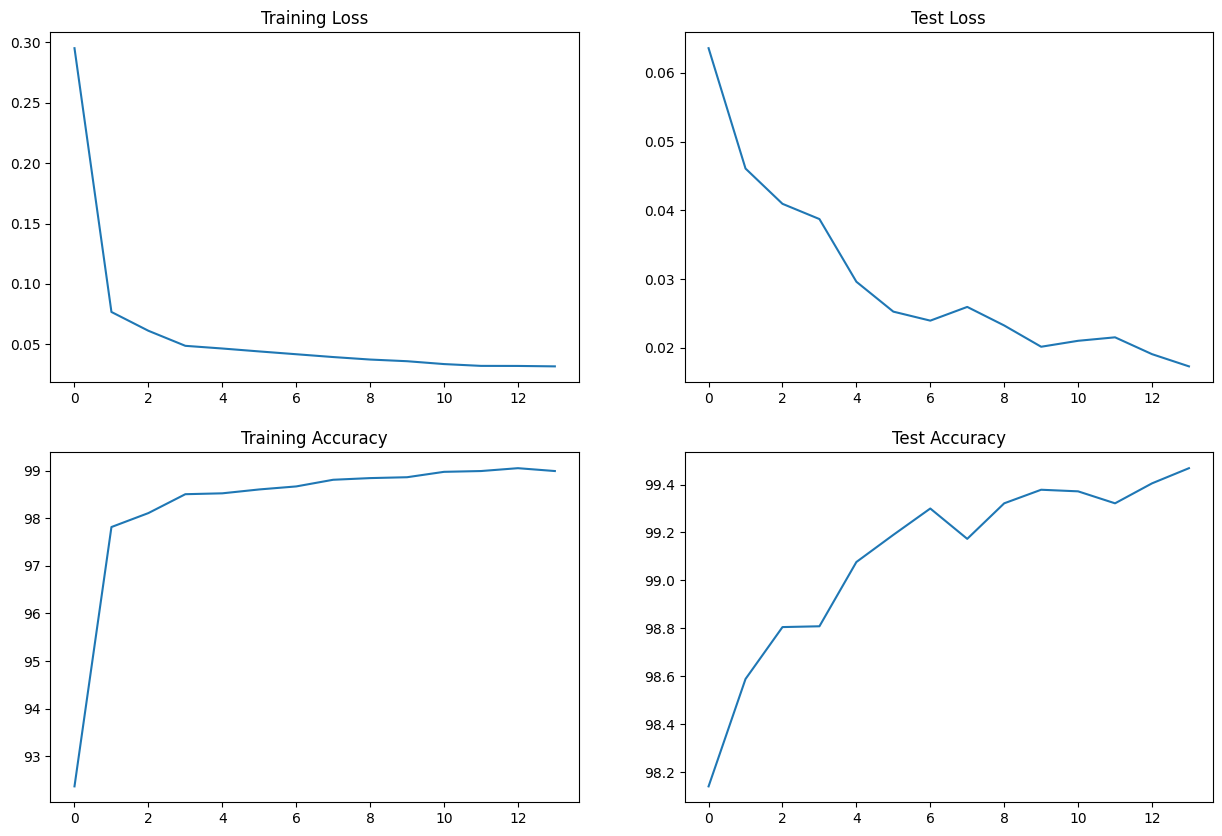

In [11]:
plot_train_test_stats(model, train_losses, train_acc, test_acc, test_losses)